In [14]:
import numpy as np
import pandas as pd

from perceptron import train, plot
#from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
print(pd.__version__)

0.23.4


In [3]:
iris = pd.read_csv('iris.csv', sep = ";")

In [4]:
iris.tail()

,sepal length,sepal width,petal length,petal width,Clase
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Se unen las clases virginica y versicolor
iris["Clase"]= iris["Clase"].replace("Iris-setosa", 0)
iris["Clase"]= iris["Clase"].replace("Iris-versicolor", 1)
iris["Clase"]= iris["Clase"].replace("Iris-virginica", 1)

In [6]:
train_set, test_set = train_test_split(iris, test_size=0.3, random_state=320)

In [7]:
P = train_set[['sepal length', 'sepal width', 'petal length', 'petal width']].values
T = train_set[['Clase']].values

2


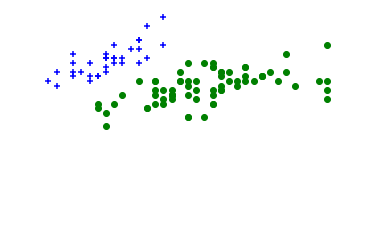

In [8]:
alfa = 0.5
max_ite = 300

(W, b, ite) = train(P, T, alfa, max_ite, False)

print(ite)

plot(P, T, W, b)

In [9]:
W, b, alfa

(array([[-0.71888456, -1.21312934,  2.18870795,  1.20765975]]),
 array([0.20792606]),
 0.5)

In [13]:
# Con los nuevos valores de W y b se calcula la predicción del modelo en test

test_set['W1'] = W[0][0]
test_set['W2'] = W[0][1]
test_set['W3'] = W[0][2]
test_set['W4'] = W[0][3]
test_set['bias'] = b[0]
test_set['salida'] =  test_set['bias'] + ((test_set['W1'] * test_set['sepal length']) +
                                          (test_set['W2'] * test_set['sepal width']) +
                                          (test_set['W3'] * test_set['petal length']) +
                                          (test_set['W4'] * test_set['petal width']) 
                                         )
test_set['Pred'] = 0
test_set.loc[test_set['salida']>=0, 'Pred'] = 1
test_set.head()

C:\Users\dalessam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dalessam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dalessam\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,sepal length,sepal width,petal length,petal width,Clase,W1,W2,W3,W4,bias,salida,Pred
65,6.7,3.1,4.4,1.4,1,-0.718885,-1.213129,2.188708,1.20766,0.207926,2.951737,1
26,5.0,3.4,1.6,0.4,0,-0.718885,-1.213129,2.188708,1.20766,0.207926,-3.526140,0
7,5.0,3.4,1.5,0.2,0,-0.718885,-1.213129,2.188708,1.20766,0.207926,-3.986543,0
63,6.1,2.9,4.7,1.4,1,-0.718885,-1.213129,2.188708,1.20766,0.207926,4.282306,1
37,4.9,3.1,1.5,0.1,0,-0.718885,-1.213129,2.188708,1.20766,0.207926,-3.671481,0


In [15]:
# Se determina el error de la prediccion

accuracy_score(test_set['Clase'], test_set['Pred'])

1.0